In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
import datetime as dt
import seaborn as sns
import hvplot.pandas
import panel as pn
pn.extension('plotly')

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (22,12)


In [3]:
# Load .env enviroment variables
load_dotenv()


True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
start_date = pd.Timestamp("2017-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_1.head()

GME                                 
                            open     high    low   close   volume
time                                                             
2017-05-19 00:00:00-04:00  23.80  24.3050  23.58  24.220  2087442
2017-05-22 00:00:00-04:00  24.35  24.5995  24.04  24.060  2206389
2017-05-23 00:00:00-04:00  24.37  24.3700  22.63  22.660  5162704
2017-05-24 00:00:00-04:00  22.61  22.8700  22.43  22.715  2175144
2017-05-25 00:00:00-04:00  23.64  23.6700  22.73  23.630  5911630

In [6]:
df_gamestop_1.index = df_gamestop_1.index.values.astype('datetime64[D]')
df_gamestop_1.index = df_gamestop_1.index.set_names(['Date'])
df_gamestop_1.tail()

GME                            
            open  high    low close   volume
Date                                        
2020-05-13  4.54  4.54  4.070  4.20  2820213
2020-05-14  4.15  4.19  3.960  4.14  1937248
2020-05-15  4.05  4.45  4.041  4.23  1827240
2020-05-18  4.40  4.63  4.360  4.57  2227162
2020-05-19  4.58  4.75  4.370  4.44  1783139

In [7]:
df_gamestop_1.to_csv("df_gamestop_1.csv")

In [8]:
MC_ten_year_1 = MCSimulation(
    portfolio_data = df_gamestop_1,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [9]:
MC_ten_year_1.portfolio_data.head()

GME                                              
             open     high    low   close   volume daily_return
Date                                                           
2017-05-19  23.80  24.3050  23.58  24.220  2087442          NaN
2017-05-22  24.35  24.5995  24.04  24.060  2206389    -0.006606
2017-05-23  24.37  24.3700  22.63  22.660  5162704    -0.058188
2017-05-24  22.61  22.8700  22.43  22.715  2175144     0.002427
2017-05-25  23.64  23.6700  22.73  23.630  5911630     0.040282

In [10]:
MC_ten_year_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.975096  0.978087  1.070774  1.029376  1.038454  1.007561  0.951646   
2     1.028824  0.952193  1.026954  0.979816  0.929914  1.060139  0.973279   
3     1.042191  0.998689  1.065119  0.970044  0.899282  1.054531  0.963713   
4     1.014845  1.052233  1.025256  0.958435  0.863473  1.046336  0.993032   
5     1.052407  1.064673  1.050132  0.979596  0.809743  0.993784  1.002662   
6     1.007368  1.066536  1.096161  1.040839  0.789003  1.032072  1.006621   
7     1.049373  1.091628  1.116489  0.958899  0.780608  1.017851  1.053322   
8     1.011104  1.079857  1.043640  0.971822  0.770779  0.996912  1.071637   
9     1.059470  1.116935  1.050073  0.938112  0.767396  0.987773  1.023804   
10    1.135732  1.101866  1.061216  0.949793  0.744608  0.918948  1.024186   
11    1.131937  1.044164  1.077793  0.971401  0.748577  0.846151  1.013225   
12    1.109250  0.996894  1.062106  0.964833  0.762249  0.820956  0.994849   
13    1.125109  0.953474  1.011558  0.951389  0.772852  0.823798  1.059156   
14    1.108502  0.933610  1.005195  1.001598  0.772460  0.860963  1.000047   
15    1.125354  0.880286  1.026601  1.013618  0.793590  0.862628  0.989468   
16    1.201569  0.901650  1.137292  1.075494  0.742647  0.880594  1.021314   
17    1.213727  0.915745  1.131818  1.068867  0.786749  0.883016  0.985220   
18    1.216986  0.956625  1.092664  1.026213  0.836393  0.847548  0.953290   
19    1.088461  1.019280  1.093891  1.051861  0.740997  0.846636  0.961605   
20    1.123196  1.005143  1.095646  1.051773  0.673577  0.846616  0.919538   
21    1.139049  0.974762  1.041695  1.082748  0.697808  0.789830  1.009646   
22    1.093205  0.989785  1.087350  1.110458  0.716088  0.782375  0.991701   
23    1.108051  0.969128  1.079840  1.184278  0.661555  0.801801  1.004681   
24    1.092150  0.978904  1.063834  1.254379  0.674172  0.799123  1.047801   
25    1.108807  0.998194  1.026889  1.281216  0.697304  0.865044  1.045274   
26    1.149795  1.061883  1.075957  1.260387  0.704989  0.852254  1.063134   
27    1.176494  1.077881  1.133578  1.203573  0.716015  0.848072  1.076692   
28    1.031755  1.060302  1.195337  1.210784  0.720174  0.858457  1.082017   
29    1.029625  1.027649  1.196214  1.196872  0.724593  0.840719  1.081631   
...        ...       ...       ...       ...       ...       ...       ...   
2491  0.003235  0.771956  0.000718  0.002014  0.000796  0.008413  0.046414   
2492  0.003259  0.777441  0.000666  0.001878  0.000811  0.008078  0.043483   
2493  0.003568  0.835358  0.000687  0.001815  0.000794  0.007744  0.044426   
2494  0.003746  0.853411  0.000672  0.001808  0.000811  0.007990  0.042989   
2495  0.003638  0.841952  0.000680  0.001862  0.000803  0.007891  0.041473   
2496  0.003597  0.871598  0.000658  0.001899  0.000772  0.007748  0.039152   
2497  0.003344  0.925329  0.000685  0.001888  0.000779  0.007340  0.037194   
2498  0.003449  0.953518  0.000699  0.001922  0.000804  0.006933  0.038904   
2499  0.003411  0.890175  0.000710  0.001915  0.000805  0.006850  0.042177   
2500  0.003342  0.871385  0.000741  0.001981  0.000806  0.007019  0.039280   
2501  0.003044  0.858373  0.000738  0.001941  0.000816  0.007393  0.037066   
2502  0.003136  0.904449  0.000747  0.001939  0.000830  0.007059  0.037815   
2503  0.003215  0.945921  0.000770  0.001823  0.000838  0.006994  0.040444   
2504  0.003347  0.973721  0.000796  0.001806  0.000891  0.007072  0.039408   
2505  0.003331  1.016167  0.000808  0.001920  0.000917  0.007467  0.038941   
2506  0.003113  0.955905  0.000791  0.002067  0.000893  0.007475  0.039289   
2507  0.003182  0.914828  0.000836  0.002082  0.000880  0.007055  0.040601   
2508  0.003105  1.005300  0.000822  0.002110  0.000888  0.006815  0.039754   
2509  0.003089  0.972040  0.000780  0.002132  0.000922  0.007123  0.040210   
2510  0.003316  0.894780  0.00074

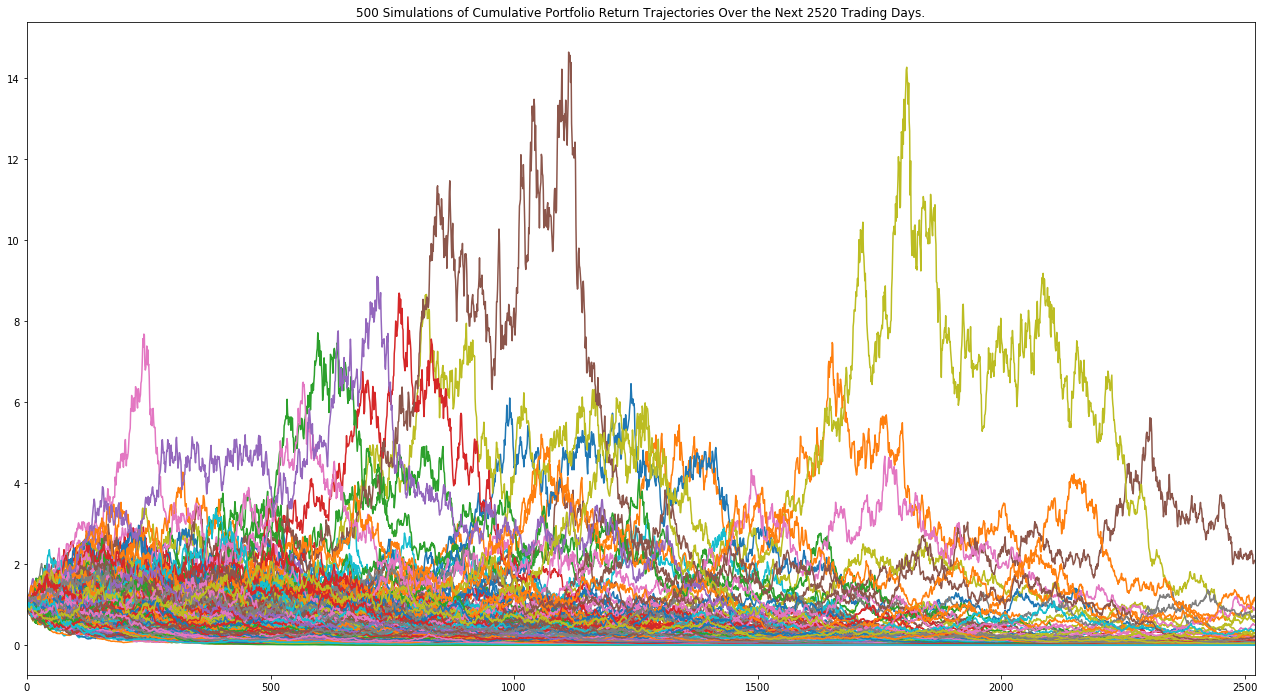

In [11]:
Sim_plot_prevolatility = MC_ten_year_1.plot_simulation()
plt.savefig("Sim_plot_prevolatility.png")


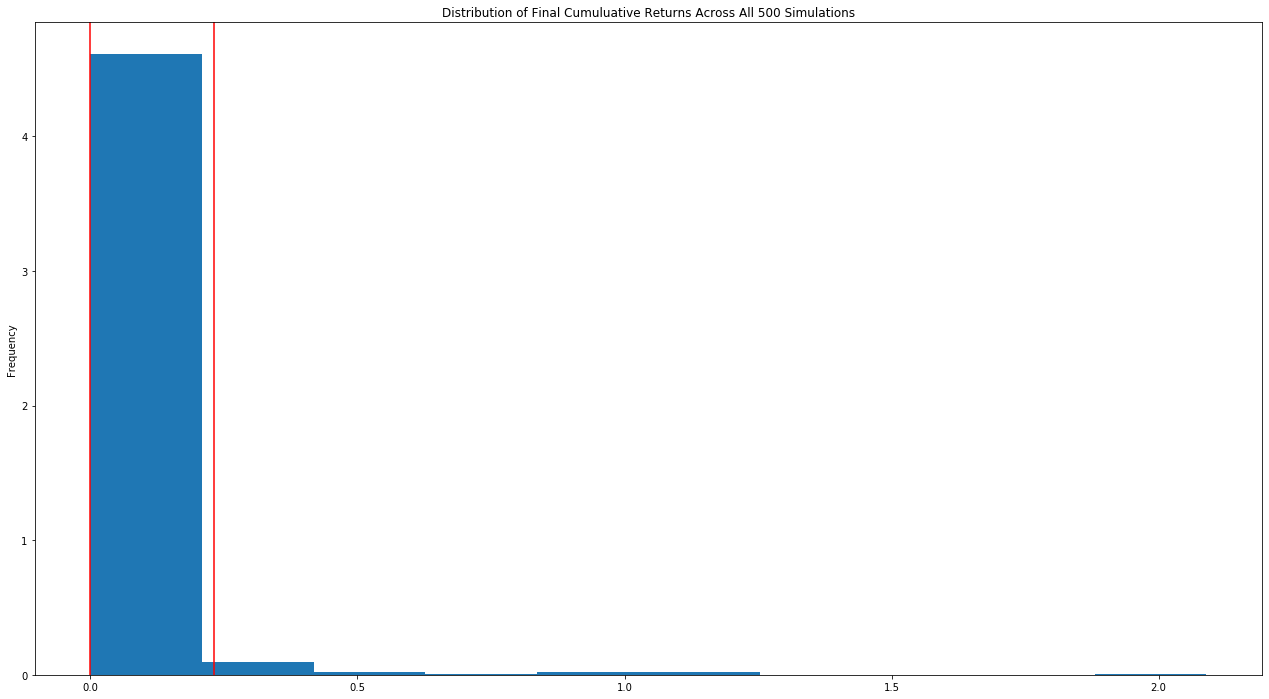

In [12]:
dist_plot_1 = MC_ten_year_1.plot_distribution()
plt.savefig("dist_plot_1.png")

In [13]:
tbl_1 = MC_ten_year_1.summarize_cumulative_return()

print(tbl_1)

count           500.000000
mean              0.033757
std               0.143044
min               0.000002
25%               0.000870
50%               0.003058
75%               0.012988
max               2.089225
95% CI Lower      0.000049
95% CI Upper      0.231073
Name: 2520, dtype: float64


In [14]:

start_date = pd.Timestamp("2018-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_2.head()



GME                                
                            open    high    low   close   volume
time                                                            
2018-05-21 00:00:00-04:00  12.52  12.885  12.49  12.765  4690915
2018-05-22 00:00:00-04:00  12.78  12.910  12.54  12.615  4030010
2018-05-23 00:00:00-04:00  12.54  12.750  12.44  12.710  2822301
2018-05-24 00:00:00-04:00  12.58  12.780  12.45  12.730  2678786
2018-05-25 00:00:00-04:00  12.75  12.800  12.58  12.640  2170417

In [15]:
df_gamestop_2.index = df_gamestop_2.index.values.astype('datetime64[D]')
df_gamestop_2.index = df_gamestop_2.index.set_names(['Date'])
df_gamestop_2.tail()

GME                                    
              open      high     low    close   volume
Date                                                  
2021-05-13  147.81  169.9500  146.43  164.999  8604101
2021-05-14  161.08  166.4700  156.22  159.900  4121086
2021-05-17  159.92  182.5000  159.00  180.505  7193150
2021-05-18  174.70  189.2000  168.27  180.574  7540252
2021-05-19  172.73  178.9799  164.15  168.839  4603845

In [16]:
df_gamestop_2.to_csv("df_gamestop_2.csv")

In [17]:
MC_ten_year_2 = MCSimulation(
    portfolio_data = df_gamestop_2,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [18]:
GME_returns = MC_ten_year_2.portfolio_data

In [19]:
GME_returns.head()

GME                                             
             open    high    low   close   volume daily_return
Date                                                          
2018-05-21  12.52  12.885  12.49  12.765  4690915          NaN
2018-05-22  12.78  12.910  12.54  12.615  4030010    -0.011751
2018-05-23  12.54  12.750  12.44  12.710  2822301     0.007531
2018-05-24  12.58  12.780  12.45  12.730  2678786     0.001574
2018-05-25  12.75  12.800  12.58  12.640  2170417    -0.007070

In [20]:
GME_daily_return = GME_returns['GME']['daily_return'] 

In [21]:
GME_daily_return.head()

Date
2018-05-21         NaN
2018-05-22   -0.011751
2018-05-23    0.007531
2018-05-24    0.001574
2018-05-25   -0.007070
Name: daily_return, dtype: float64

In [22]:
GME_daily_return = GME_daily_return.dropna()

GME_daily_return.isnull().sum()

0

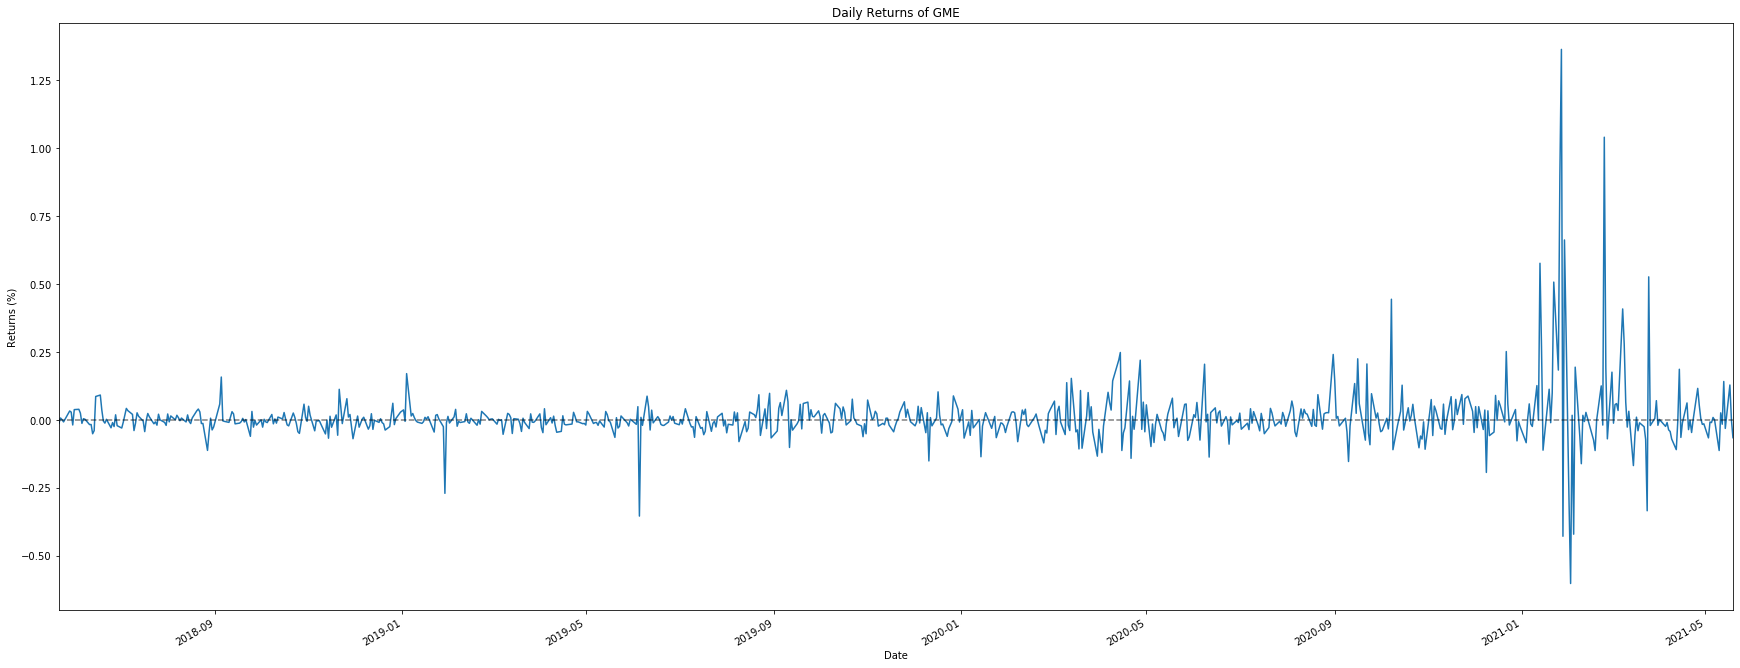

In [23]:
#GME daily returns plot

GME_return_plt = GME_daily_return.plot(figsize=(30,12), title='Daily Returns of GME')
GME_return_plt.set(ylabel='Returns (%)')
plt.axhline(y=0.0, color='k', alpha=0.5, linestyle='--')  
plt.savefig("GME_return_plt.png")
plt.show()


In [24]:
MC_ten_year_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0             1          2         3           4    \
0         1.000000  1.000000e+00   1.000000  1.000000    1.000000   
1         0.953451  8.683015e-01   1.105305  0.995601    1.037634   
2         0.952071  9.553403e-01   1.188812  0.926787    1.262411   
3         0.992875  1.045755e+00   1.173372  1.041821    1.134846   
4         0.851240  9.701583e-01   1.345155  0.933328    1.226200   
5         0.888109  8.790588e-01   1.385469  0.861783    1.266307   
6         0.897699  9.748426e-01   1.075434  0.870019    1.178703   
7         0.726440  1.244674e+00   0.944915  0.839672    1.080813   
8         0.837303  1.244290e+00   0.942643  0.880381    1.021121   
9         0.688674  1.272635e+00   1.114009  0.744009    1.232094   
10        0.698298  1.328224e+00   1.092370  0.549845    1.035051   
11        0.706204  1.093717e+00   1.022177  0.645621    1.003185   
12        0.718090  1.192723e+00   1.003604  0.625379    0.979134   
13        0.759393  1.400583e+00   1.024062  0.731824    0.930426   
14        0.677204  1.382674e+00   1.130328  0.667833    0.956556   
15        0.742497  1.468021e+00   1.063707  0.705878    0.885268   
16        0.678609  1.488264e+00   1.090512  0.683655    0.892925   
17        0.719273  1.669594e+00   1.157797  0.752077    0.874192   
18        0.745251  1.719841e+00   1.138351  0.710619    0.910841   
19        0.717321  1.516962e+00   1.323601  0.757328    1.162286   
20        0.597793  1.607652e+00   1.412466  0.635754    1.098925   
21        0.680266  1.610998e+00   1.384085  0.611116    1.029350   
22        0.659319  1.601702e+00   1.191645  0.577737    1.099079   
23        0.685767  1.731866e+00   1.296928  0.604049    1.186720   
24        0.511232  1.704617e+00   1.314157  0.687735    1.296342   
25        0.553798  1.684280e+00   1.546866  0.709001    1.303190   
26        0.550484  1.357762e+00   1.714894  0.718046    1.023295   
27        0.571236  1.492837e+00   1.685264  0.809274    1.247798   
28        0.562495  1.360543e+00   1.555337  0.861044    1.457653   
29        0.661091  1.179390e+00   1.471508  1.018462    1.504460   
...            ...           ...        ...       ...         ...   
2491   8381.015065  8.422310e+05  30.176217  0.526110   82.057959   
2492   7963.046699  7.422482e+05  34.310031  0.506629   91.712006   
2493   7965.163724  7.800055e+05  36.989261  0.493139   73.174167   
2494   8163.114447  7.659384e+05  36.193852  0.470749   86.841125   
2495   8325.623362  9.042621e+05  33.744360  0.596869   80.308090   
2496   6444.346708  1.041047e+06  34.305459  0.667571   77.719722   
2497   8051.870514  8.316923e+05  34.376967  0.641622   81.649873   
2498   8293.195840  8.529328e+05  35.800759  0.615988   89.535365   
2499   8851.686323  9.580196e+05  35.593552  0.699827   85.438101   
2500   9335.846995  9.891527e+05  31.222564  0.689621   93.910198   
2501  10100.051739  1.012220e+06  38.346287  0.768077   79.259782   
2502   9600.810818  1.153954e+06  43.433513  0.868766   82.382051   
2503   8482.455527  1.221168e+06  43.661882  0.726554   72.322635   
2504   6913.059094  1.079753e+06  52.793779  0.687074   82.968548   
2505   7964.676613  1.098135e+06  51.708161  0.650678   99.937344   
2506   8097.640821  9.333207e+05  54.378591  0.656154   99.853092   
2507   8464.369414  1.054295e+06  47.527393  0.596337  101.200637   
2508   8590.629790  9.547652e+05  44.450341  0.604213  100.326806   
2509   9267.172872  9.262169e+05  45.924213  0.587014  110.707433   
2510   8944.868403  9.665072e+05  44.600538  0.609184  109.338229   
2511  10273.324266  1.094336e+06  50.757678  0.525607  108.960238   
2512  10224.367218  1.081352e+06  62.043421  0.574841   94.026874   
2513   9856.529650  9.742314e+05  65.256481  0.607534   91.837966   
2514  11023.614526  1.101194e+06  63.514284  0.488806   97.089157   
2515   8812.092054  1.364910e+06  67.638081  0.383449  107.742747   
2516   7454.857318  1.170895e+06  49.811082  0.358958  126.260562   
2517   6421.7

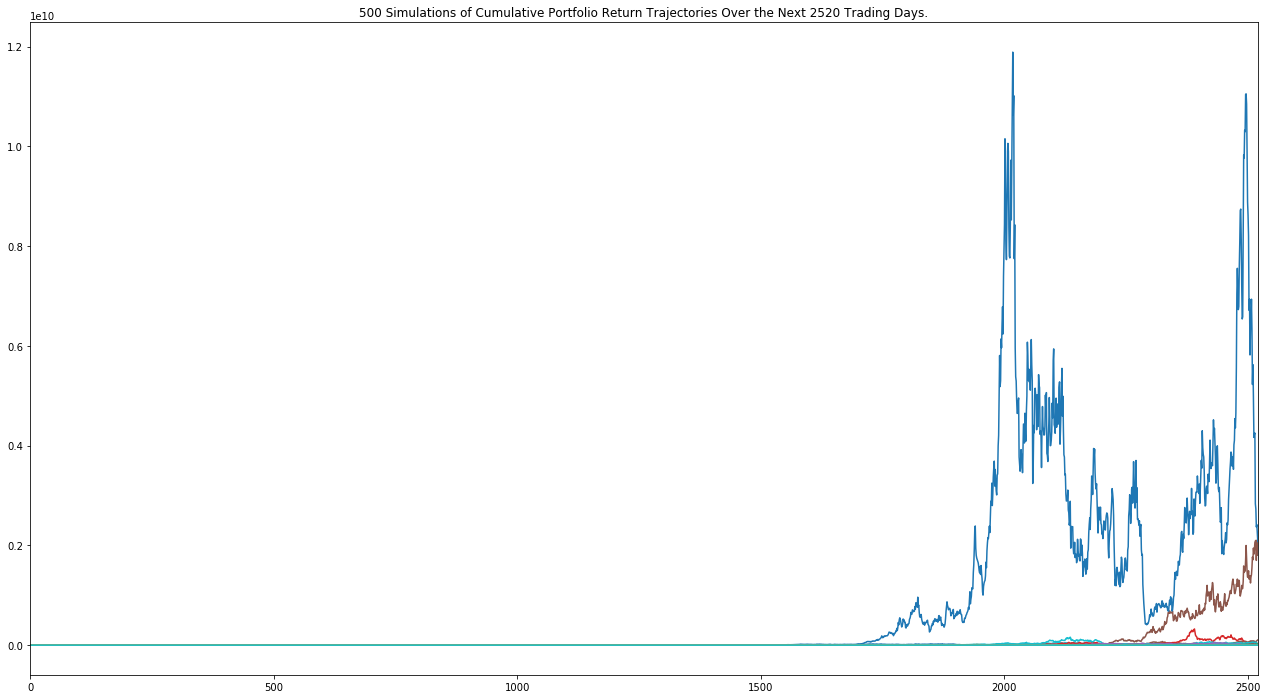

In [25]:
Sim_plot_postvolatility = MC_ten_year_2.plot_simulation()
plt.savefig("Sim_plot_postvolatility.png")

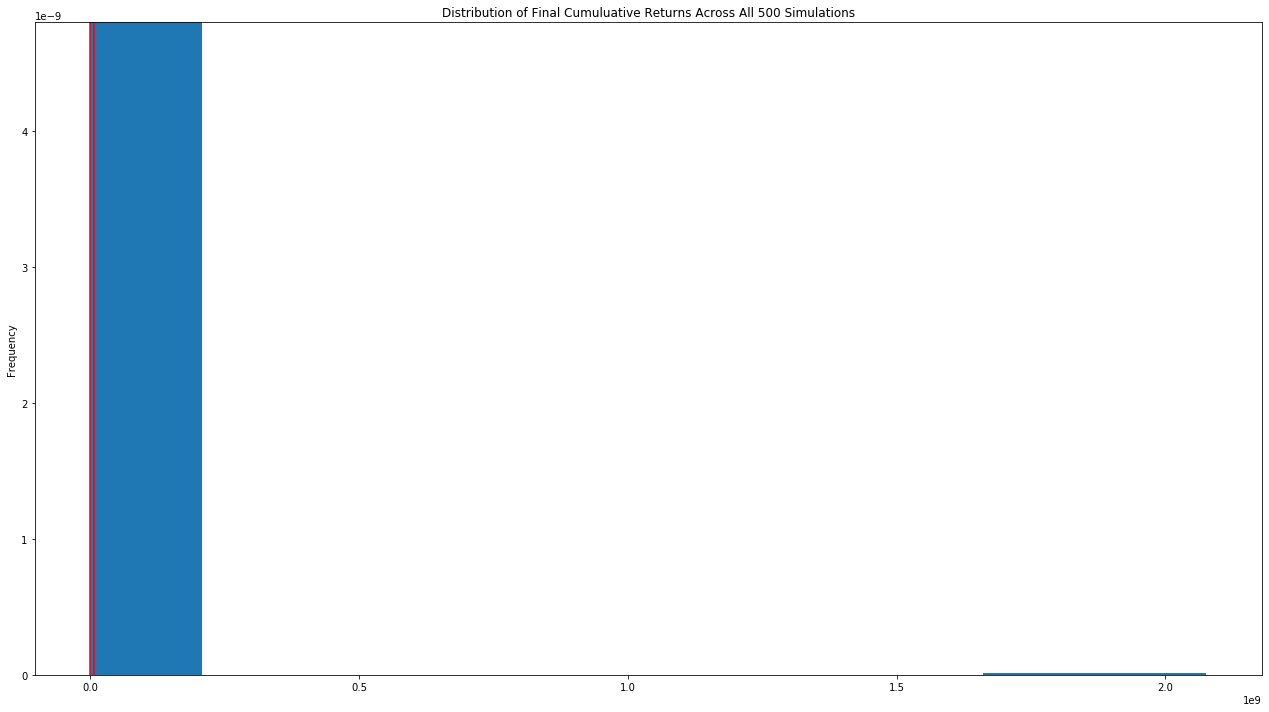

In [26]:
dist_plot_2 = MC_ten_year_2.plot_distribution()
plt.savefig("dist_plot_2.png")

In [27]:
tbl_2 = MC_ten_year_2.summarize_cumulative_return()

print(tbl_2)

count           5.000000e+02
mean            8.431687e+06
std             1.229659e+08
min             9.962486e-06
25%             8.437061e+00
50%             2.506404e+02
75%             1.105785e+04
max             2.076547e+09
95% CI Lower    1.074359e-02
95% CI Upper    6.446338e+06
Name: 2520, dtype: float64


In [28]:
#Import Twitter data for GME mentions 

twitter_data_path = Path("twitter_data_2021.csv")

twitter_data = pd.read_csv(twitter_data_path, parse_dates=True, infer_datetime_format=True)

twitter_data['Date']=pd.to_datetime(twitter_data['Date'])

twitter_data = twitter_data.set_index('Date')

twitter_data.tail()



gamestock gamestonk gme r/wallstreetbets  total_tweets
Date                                                             
2021-05-15         0         0   0                0             0
2021-05-16         0         0   0                0             0
2021-05-17         0         0   0                0             0
2021-05-18         0         0   0                0             0
2021-05-19         0         0   0                0             0

In [29]:
import datetime as dt

df_gamestop_2.index = df_gamestop_2.index.values.astype('datetime64[D]')
df_gamestop_2.index = df_gamestop_2.index.set_names(['Date'])
df_gamestop_2.tail()

GME                                    
              open      high     low    close   volume
Date                                                  
2021-05-13  147.81  169.9500  146.43  164.999  8604101
2021-05-14  161.08  166.4700  156.22  159.900  4121086
2021-05-17  159.92  182.5000  159.00  180.505  7193150
2021-05-18  174.70  189.2000  168.27  180.574  7540252
2021-05-19  172.73  178.9799  164.15  168.839  4603845

In [30]:
Social_GME_data = pd.merge(twitter_data, df_gamestop_2['GME'], how='outer', on='Date')

Social_GME_data = Social_GME_data.drop(['gamestock','gamestonk','gme','r/wallstreetbets'], axis =1)

Social_GME_data = Social_GME_data.drop(['open','high','low','volume'], axis =1)

Social_GME_data.rename(columns = {'total_tweets': 'Total Tweets', 'close': 'Closing Price'}, inplace = True)

Social_GME_data.head()


Total Tweets  Closing Price
Date                                   
2018-05-21           301         12.765
2018-05-22           413         12.615
2018-05-23           324         12.710
2018-05-24           328         12.730
2018-05-25           315         12.640

In [31]:
Social_GME_data_pct = Social_GME_data .pct_change()

Social_GME_data_pct.head()

Total Tweets  Closing Price
Date                                   
2018-05-21           NaN            NaN
2018-05-22      0.372093      -0.011751
2018-05-23     -0.215496       0.007531
2018-05-24      0.012346       0.001574
2018-05-25     -0.039634      -0.007070

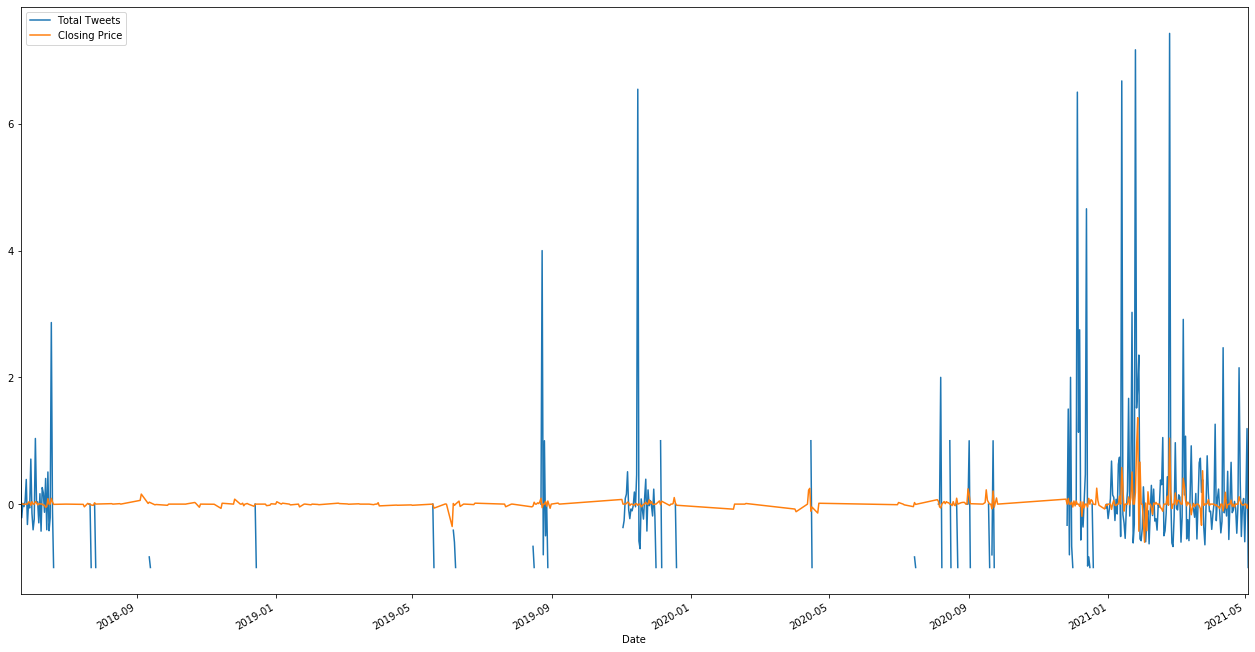

In [32]:
Social_GME_pct_plot  = Social_GME_data_pct.dropna() 
Social_GME_pct_plot.head()

Social_GME_pct_plot.plot()
plt.savefig("Social_GME_pct_plot.png")



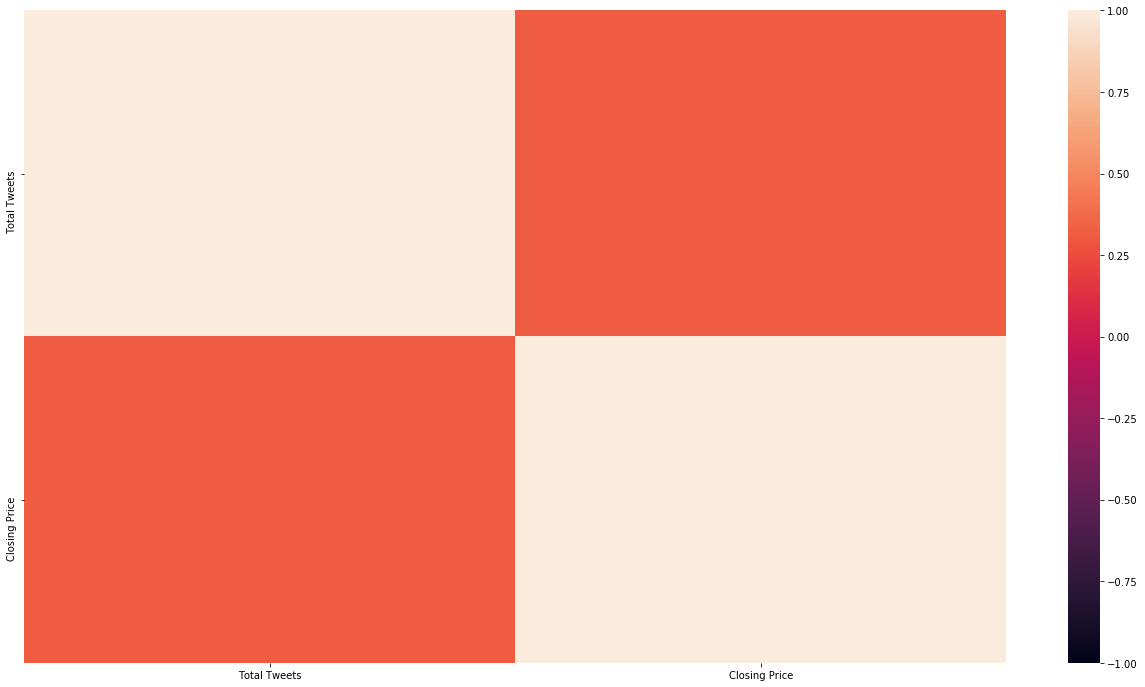

In [33]:
social_GME_corr = Social_GME_pct_plot.corr()
social_GME_corr = sns.heatmap(social_GME_corr ,vmin=-1, vmax=1)
plt.savefig("social_GME_corr.png")

In [34]:
GME_daily_return.head()

Date
2018-05-22   -0.011751
2018-05-23    0.007531
2018-05-24    0.001574
2018-05-25   -0.007070
2018-05-29    0.033228
Name: daily_return, dtype: float64

In [35]:
daily_returns_ewm = GME_daily_return.ewm(halflife=21).std()

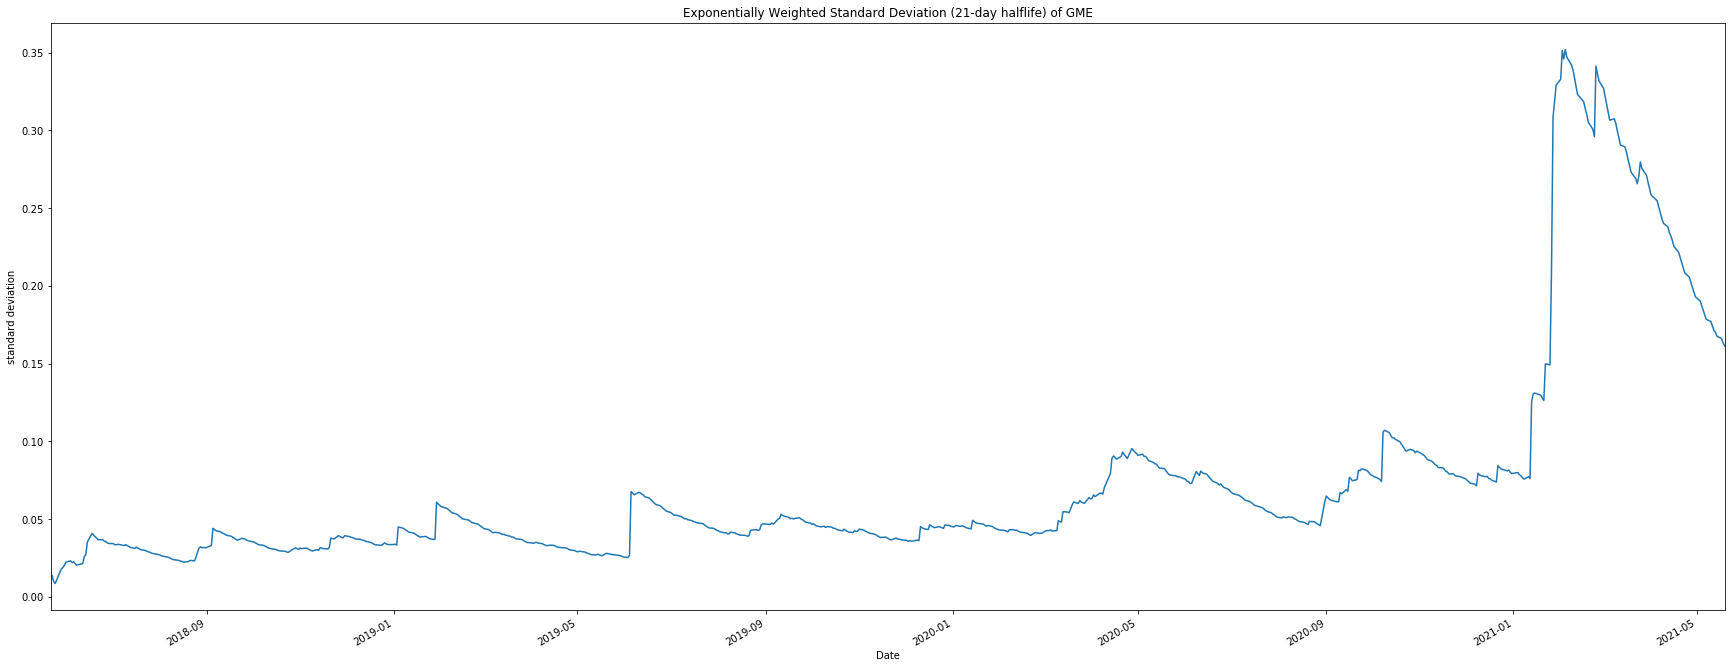

In [36]:

GME_ewm_std = daily_returns_ewm.plot(figsize=(30,12), title='Exponentially Weighted Standard Deviation (21-day halflife) of GME')
GME_ewm_std.set(ylabel='standard deviation')
plt.savefig("GME_ewm_std.png")
plt.show()



In [37]:
Social_GME_data.head()

Total Tweets  Closing Price
Date                                   
2018-05-21           301         12.765
2018-05-22           413         12.615
2018-05-23           324         12.710
2018-05-24           328         12.730
2018-05-25           315         12.640

In [38]:
Social_GME_data_index = Social_GME_data.reset_index().dropna() 

In [39]:
Social_GME_data_index.head()

Date  Total Tweets  Closing Price
0 2018-05-21           301         12.765
1 2018-05-22           413         12.615
2 2018-05-23           324         12.710
3 2018-05-24           328         12.730
4 2018-05-25           315         12.640

In [40]:
Social_GME_data_plot = Social_GME_data.loc[Social_GME_data_index['Date'][600:1094]]


In [41]:
scatterplot_GME = sns.scatterplot(data=Social_GME_data_plot, x="Date", y="close", size='total_tweets', hue="total_tweets")
plt.savefig("scatterplot_GME.png")


ValueError: Could not interpret value `close` for parameter `y`

In [ ]:
#Import Scoial media metrics into dashboard notebook

twitter_data_path = Path("twitter_data_2021.csv")

twitter_data = pd.read_csv(twitter_data_path, parse_dates=True, infer_datetime_format=True)

twitter_data['Date']=pd.to_datetime(twitter_data['Date'])

twitter_data = twitter_data.set_index('Date')

twitter_data = twitter_data.replace(',','',regex = True)

twitter_data = twitter_data.astype(int)

twitter_data.dtypes

max_twitter = twitter_data.max().max()

twitter_data.loc['2021-01-01':'2021-05-12'].hvplot(x='Date', y=['gamestock','gamestonk','r/wallstreetbets','gme'], rot =90, ylim=(0,max_twitter)).opts(yformatter="%.0f")




In [ ]:
plt.savefig("twitter_data_graph.png")
twitter_data_graph

In [ ]:
# Plots to tell the financial data story

#daily return plot
GME_return_plt

#Simulation plots pre and post stock price volatility
Sim_plot_prevolatility
Sim_plot_postvolatility

#Moving weighted average standard deviation plot to show volatility
GME_ewm_std

# Pct change correlation between Social mentions and Stock price changes
social_GME_corr

#Scatterplot graph showing a relationship between date / stock price and twitter mentions (Just need to adjust the x axis scale and show dates from 2019 onwards)
scatterplot_GME




In [ ]:
#Create dashboard 

In [ ]:

def GME_return():
    """Daily Return Plot"""
     
    plt_fig1 = plt.figure()
    fig1 = GME_daily_return.plot(figsize=(30,12), title='Daily Returns of GME')
    fig1.set(ylabel='Returns (%)')
    plt.axhline(y=0.0, color='k', alpha=0.5, linestyle='--') 
    plt.close(plt_fig1)
    fig1 = pn.pane.Matplotlib(plt_fig1)
    
    return fig1



In [ ]:
def Sim_plot_prevol():
    """Simulation plots post stock price volatility"""
    
    
    plt_fig2 = plt.figure()
    fig2 = MC_ten_year_1.plot_simulation()
    plt.close(plt_fig2)
    fig2 = pn.pane(plt_fig2)
   
    return fig2

In [ ]:
def Sim_plot_postvol():
    """Simulation plots post stock price volatility"""
    
    
    plt_fig3 = plt.figure()
    fig3 = MC_ten_year_2.plot_simulation()
    plt.close(plt_fig3)
    fig3 = pn.pane(plt_fig3)
   
    return fig3

In [ ]:
def GME_ewm_s():
    """Moving weighted average standard deviation plot to show volatility"""
    
    
    plt_fig4 = plt.figure()
    fig4 = daily_returns_ewm.plot(figsize=(30,12), title='Exponentially Weighted Standard Deviation (21-day halflife) of GME')
    fig4.set(ylabel='standard deviation')
    plt.close(plt_fig4)
    fig4 = pn.pane.Matplotlib(plt_fig4)
    
   
    return fig4

In [ ]:
def social_GME_c():
    """Pct change correlation between Social mentions and Stock price changes"""
    
    
    plt_fig5 = plt.figure()
    fig5 = Social_GME_pct_plot.corr()
    sns.heatmap(fig5 ,vmin=-1, vmax=1)
    plt.close(plt_fig5)
    fig5 = pn.pane.Matplotlib(plt_fig5)
    
   
    return fig5

In [ ]:
def scatterplot():
    """Scatterplot graph showing a relationship between date / stock price and twitter mentions (Just need to adjust the x axis scale and show dates from 2019 onwards"""
    
    plt_fig6= plt.figure()
    fig6 = sns.scatterplot(data=Social_GME_data, x="Date", y="close", size='total_tweets', hue="total_tweets")
    plt.close(plt_fig6)
    fig6 = pn.pane.Matplotlib(plt_fig6)
    
    return fig6

In [ ]:
def twitter_chart():
    """Line graph showing the key word mentions over the period of time"""
    
    plt_fig7= plt.figure()
    fig7 = twitter_data.loc['2021-01-01':'2021-05-12'].hvplot(x='Date', y=['gamestock','gamestonk','r/wallstreetbets','gme'], rot =90, ylim=(0,max_twitter)).opts(yformatter="%.0f")
    plt.close(plt_fig7)
    fig7 = pn.pane.Matplotlib(plt_fig7)
    
    return fig7



In [ ]:
# Create a title for the dashboard
dash_title = pn.pane.Markdown(
    """
    # Gamestop - Social Event
    """)


# Creating other misc elements for the dashboard
overview_msg = pn.pane.Markdown(
    """
    This dashboard aims to provide a snapshot of the analysis completed on the Gamestop event that occured in 2021 and how social media influenced the price.
    <br>
    
    """)

overview_tab = pn.Column('## Dashboard GME Overview', overview_msg, GME_return(),social_GME_c(),twitter_chart())
montecarlo_tab = pn.Column('## Monte Carlo Simulations', overview_msg, Sim_plot_prevol(), Sim_plot_postvol())
correlation_tab = pn.Column('## Correlation', GME_ewm_s(),scatterplot()) 

# Create a tab layout for the dashboard

dash_tabs = pn.Tabs(('Overview', overview_tab),
                  ('Monte Carlo Simulations', montecarlo_tab),
                   ('Correlation',correlation_tab ),)


In [ ]:
# Create the dashboard
dashboard = pn.Column(pn.Row(dash_title), dash_tabs, width=1500)


In [ ]:
# Serve the dashboard
dashboard.servable()